In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r'C:\Users\PREM\Desktop\Assignment of DSA\titanic_dataset  assig.csv')

# Understand different features in the training dataset

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Clean the features

In [9]:
data = data.drop('Name', axis=1,)
data = data.drop('Ticket', axis=1,)
data = data.drop('Fare', axis=1,)
data = data.drop('Cabin', axis=1,)

In [10]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
dtype: object

In [11]:
data['Family'] = data['SibSp'] + data['Parch'] + 1

In [12]:
data = data.drop('SibSp', axis=1,)
data = data.drop('Parch', axis=1,)

In [13]:
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# Missing value handling

In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Embarked         2
Family           0
dtype: int64

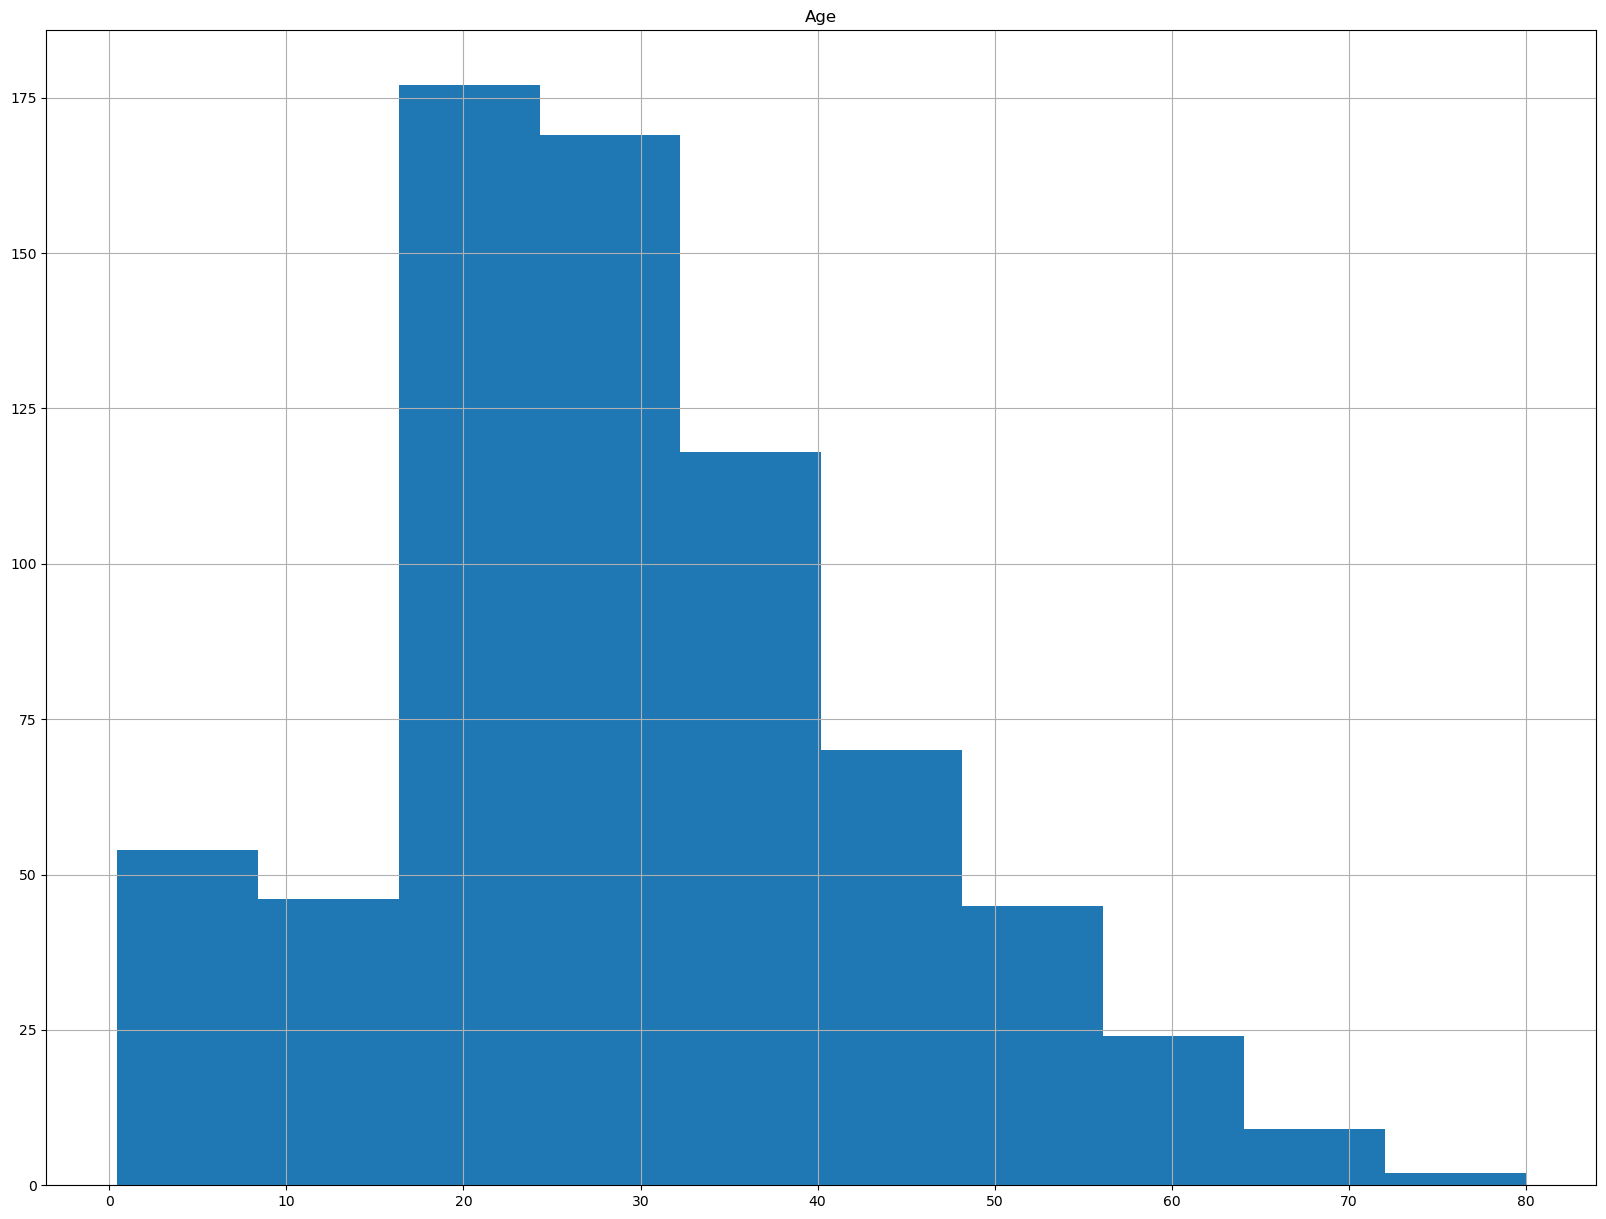

In [15]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

C:\Users\PREM\AppData\Local\Temp\ipykernel_11456\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

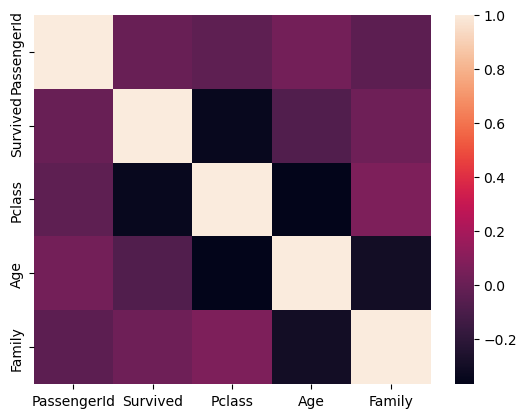

In [16]:
sns.heatmap(data.corr())

In [17]:
data["Age"] = data["Age"].fillna(data["Age"].median())

In [18]:
data['Age'].isna().sum()

0

In [19]:
data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [20]:
data["Embarked"] = data["Embarked"].fillna("S")

In [21]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
Family         0
dtype: int64

In [22]:
# Checking statistics of Age column
data["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
Embarked        object
Family           int64
dtype: object

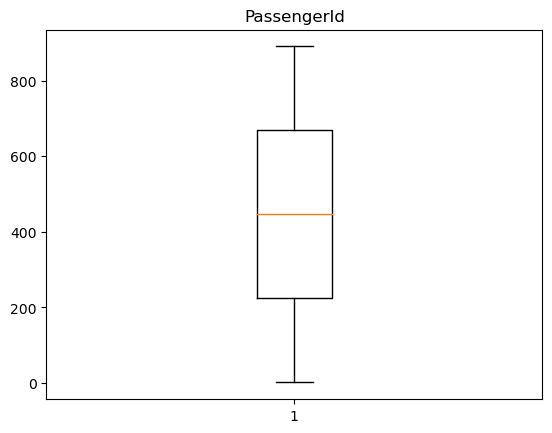

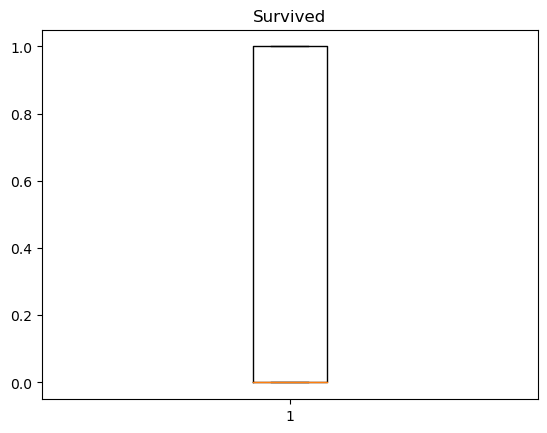

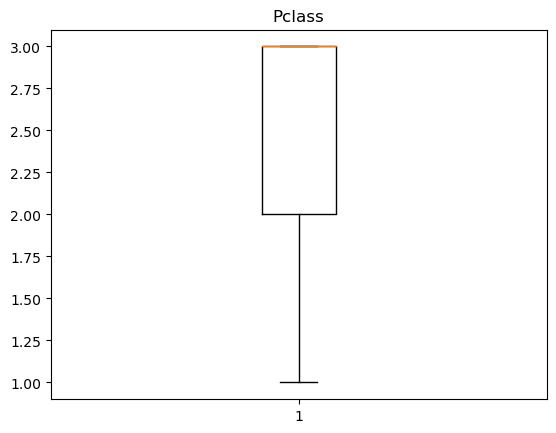

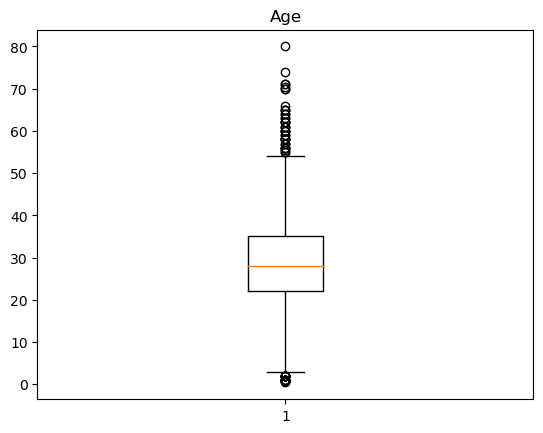

In [24]:
num_cols =['PassengerId', 'Survived', 'Pclass','Age']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [25]:
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')

C:\Users\PREM\AppData\Local\Temp\ipykernel_11456\1385708954.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
C:\Users\PREM\AppData\Local\Temp\ipykernel_11456\1385708954.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
C:\Users\PREM\AppData\Local\Temp\ipykernel_11456\1385708954.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', o

In [26]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [27]:
data['Age'].median()

28.0

In [28]:
IQR = Q3-Q1
print(IQR)

13.0


In [29]:
up_lim = Q3+1.5*IQR
low_lim =Q1-1.5*IQR
print(up_lim)
print(low_lim)

54.5
2.5


In [30]:
outliers = []
for x in data['Age']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)
outliers

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [31]:
ind1 =data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [32]:
data.drop([11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],inplace=True)

In [33]:
data.shape

(849, 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x29c8c597550>,
 'caps': [<matplotlib.lines.Line2D at 0x29c8c597a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x29c8c5972b0>],
 'medians': [<matplotlib.lines.Line2D at 0x29c8c597eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29c8c5d0190>],
 'means': []}

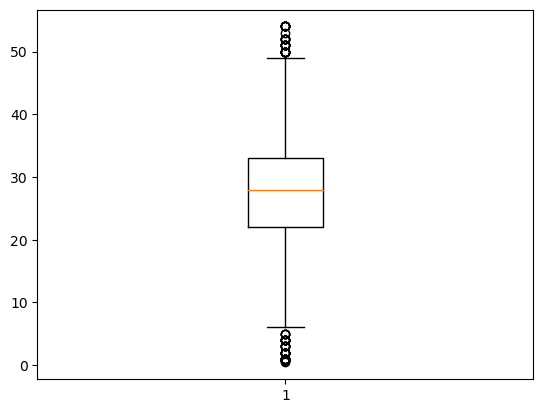

In [34]:
plt.boxplot(data['Age'])

In [35]:
#one hot encoding use to change categorical value to numerical

In [36]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family
0,1,0,3,male,22.0,S,2
1,2,1,1,female,38.0,C,2
2,3,1,3,female,26.0,S,1
3,4,1,1,female,35.0,S,2
4,5,0,3,male,35.0,S,1


In [37]:
data =pd.get_dummies(data)

In [38]:
data.head()

,PassengerId,Survived,Pclass,Age,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,2,0,1,0,0,1
1,2,1,1,38.0,2,1,0,1,0,0
2,3,1,3,26.0,1,1,0,0,0,1
3,4,1,1,35.0,2,1,0,0,0,1
4,5,0,3,35.0,1,0,1,0,0,1


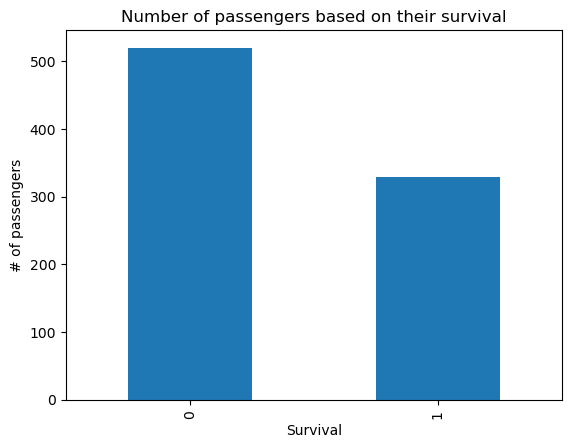

In [39]:
#Visualize the target variable
data.Survived.value_counts().plot(kind='bar')

plt.xlabel('Survival')
plt.ylabel('# of passengers')
plt.title('Number of passengers based on their survival')
plt.show()

In [40]:
#Survival by age

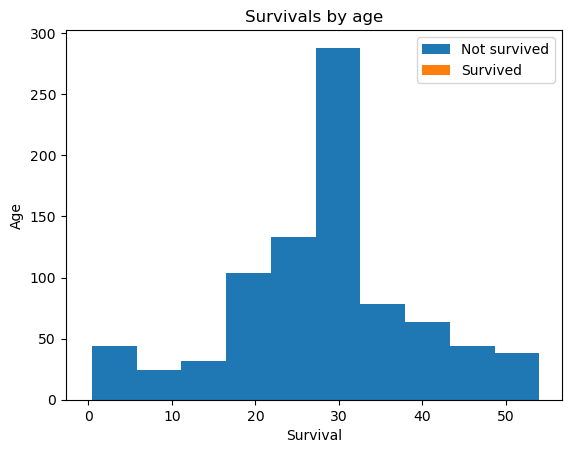

In [41]:
fig, ax = plt.subplots()
 
ax.hist(data.Age.dropna(), label='Not survived')
ax.hist(data['Age'][data.Survived == '1'].dropna(), label='Survived')
 
plt.xlabel('Survival')
plt.ylabel('Age')
plt.title('Survivals by age')
plt.legend()
plt.show()

In [42]:
#Split the data into features (X) and the target variable (y)

In [43]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=42)

In [45]:
X_train.shape

(636, 9)

In [46]:
X_test.shape

(213, 9)

In [47]:
y_train.shape

(636,)

In [48]:
y_test

537    1
375    1
117    0
721    0
42     0
      ..
215    1
614    0
633    0
443    1
345    1
Name: Survived, Length: 213, dtype: int64

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred_lr = logit_model.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy =',accuracy_score(y_test,y_pred_lr))
print('Precision =',precision_score(y_test,y_pred_lr))
print('Recall =',recall_score(y_test,y_pred_lr))
print('f1 score =',f1_score(y_test,y_pred_lr))

Accuracy = 0.7746478873239436
Precision = 0.8194444444444444
Recall = 0.6276595744680851
f1 score = 0.7108433734939759


In [52]:
confusion_matrix(y_test,y_pred_lr)

array([[106,  13],
       [ 35,  59]], dtype=int64)

In [53]:
y_pred_lr

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [54]:
y_test

537    1
375    1
117    0
721    0
42     0
      ..
215    1
614    0
633    0
443    1
345    1
Name: Survived, Length: 213, dtype: int64

# K -Nearest Neighbor

In [55]:
from sklearn.neighbors import KNeighborsClassifier
metric= []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn =classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

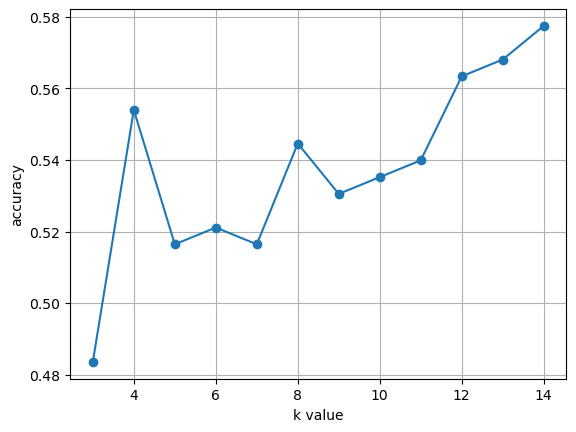

In [56]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [57]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn =classifier.predict(X_test)

In [58]:
print('Accuracy =',accuracy_score(y_test,y_pred_knn))
print('Precision =',precision_score(y_test,y_pred_knn))
print('Recall =',recall_score(y_test,y_pred_knn))
print('f1 score =',f1_score(y_test,y_pred_knn))

Accuracy = 0.5164319248826291
Precision = 0.41509433962264153
Recall = 0.23404255319148937
f1 score = 0.29931972789115646


# SVM model


In [59]:
from sklearn.svm import SVC

In [60]:
svmclf = SVC(kernel='linear')
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [61]:
y_pred =svmclf.predict(X_test)

In [62]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.7746478873239436


In [63]:
print(confusion_matrix(y_test,y_pred))

[[106  13]
 [ 35  59]]


In [64]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [65]:
#Define the K-fold and Stratified K-fold cross-validation objects:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [66]:
#Perform K-fold cross-validation for the KNN model:

In [67]:
knn_scores = cross_val_score(classifier, X, y, cv=k_fold)
average_accuracy_score = knn_scores.mean()
print("KNN Average Accuracy:", average_accuracy_score)

KNN Average Accuracy: 0.5501357466063348


In [68]:
#Perform Stratified K-fold cross-validation for the KNN model:

In [69]:
stratified_knn_scores = cross_val_score(classifier, X, y, cv=stratified_k_fold)
average_accuracy_stratified_knn = stratified_knn_scores.mean()
print("Stratified KNN Average Accuracy:", average_accuracy_stratified_knn)

Stratified KNN Average Accuracy: 0.5370971110337626


In [70]:
#Perform K-fold cross-validation for the SVM model

In [71]:
svm_scores = cross_val_score(svmclf, X, y, cv=k_fold)
average_accuracy_svm = svm_scores.mean()
print("SVM Average Accuracy:", average_accuracy_svm)

SVM Average Accuracy: 0.7820953706926557


In [ ]:
stratified_svm_scores = cross_val_score(svmclf, X, y, cv=stratified_k_fold)
average_accuracy_stratified_svm = stratified_svm_scores.mean()
print("Stratified SVM Average Accuracy:", average_accuracy_stratified_svm)

In [ ]:
#svm model is good compare to knn

In [ ]:
#The last code isn't running and is taking too long to run; possibly I wrote the code correctly; if so, please accept this as an answer.